<a href="https://colab.research.google.com/github/Deepak2102-R/github-slideshow/blob/main/covid_19_screening_from_audio_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [44]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [45]:
! chmod 600 ~/.kaggle/kaggle.json


In [46]:

! kaggle datasets download nasrulhakim86/coughvid-wav

coughvid-wav.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
!unzip coughvid-wav.zip

Archive:  coughvid-wav.zip
replace public_dataset/00014dcc-0f06-4c27-8c7b-737b18a2cf4c.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace public_dataset/00014dcc-0f06-4c27-8c7b-737b18a2cf4c.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N
A


# Machine Learning and Artificial Neural Network approach for COVID-19 Early Detection From Audio Recording | Part 1

by Nasrul Hakim

![https://miro.medium.com/max/1400/1*hJ7Hl9k1m0tqOFLh6mH2vA.jpeg](https://miro.medium.com/max/1400/1*hJ7Hl9k1m0tqOFLh6mH2vA.jpeg)

## Introduction

The SARS-CoV-2-caused novel coronavirus disease 2019 (COVID-19) pandemic remains a critical and urgent threat to global health. While advancements in testing have made these tools more widely available in recent months, there is still a need for low-cost, quick, and scalable COVID-19 screening technology.
In the context of the COVID-19 pandemic, considerable research activity has emerged to use respiratory sounds (e.g., coughs, breathing, and voice) as primary sources of information.

COVID-19 is a respiratory condition that affects breathing and voice, causing symptoms such as a dry cough, sore throat, an overly breathy voice, and typical breathing pattern. These are all symptoms that can distinguish patients' voices, resulting in recognisable voice signatures and allowing the training of algorithms to predict the presence of a SARS-COV-2 infection or as a tool to grade the disease's severity. The findings of Cambridge University (Area Under the ROC Curve, AUC = 80%) and MIT scientists (AUC = 97 percent, based on cough recordings only) on vocal biomarkers to aid in the diagnosis of COVID-19 are promising.


## The COUGHVID crowdsourcing dataset

Cough audio signal classification has been successfully used to diagnose a variety of respiratory conditions, and there has been significant interest in leveraging Machine Learning (ML) to provide widespread COVID-19 screening. The COUGHVID dataset provides over 25,000 crowdsourced cough recordings representing a wide range of participant ages, genders, geographic locations, and COVID-19 statuses. Four experienced physicians labeled more than 2,800 recordings to diagnose medical abnormalities present in the coughs, contributing one of the largest expert-labeled cough datasets in existence that can be used for a plethora of cough audio classification tasks.

### Recording quality estimation
Every user who uploaded their cough sound to the COUGHVID dataset presumably used a different device, potentially introducing a variation in recording quality due to the different recording hardware and software of each device. Furthermore, the recordings were captured at various locations around the world with non-constant degrees of background noise. In order to assist users of the COUGHVID dataset in estimating the quality of each signal, open-sourced code to estimate the Signal-to-Noise Ratio (SNR) of each cough recording is provided.

#### Reference
Orlandic, L., Teijeiro, T. & Atienza, D. <br>
The COUGHVID crowdsourcing dataset, a corpus for the study of large-scale cough analysis algorithms. Sci Data 8, 156 (2021). <br>
https://doi.org/10.1038/s41597-021-00937-4<br>
https://www.nature.com/articles/s41597-021-00937-4<br>
https://c4science.ch/diffusion/10770/

## Data Analysis

In [ ]:
# data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

import seaborn as sns
sns.set_palette(sns.color_palette("GnBu_r"))
import matplotlib.pyplot as plt
from IPython import display

# set variables
ROOT = '/content/public_dataset/'

# load coughvid meta
data_raw = pd.read_csv(ROOT+'metadata_compiled.csv')
data_raw.head(3)

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


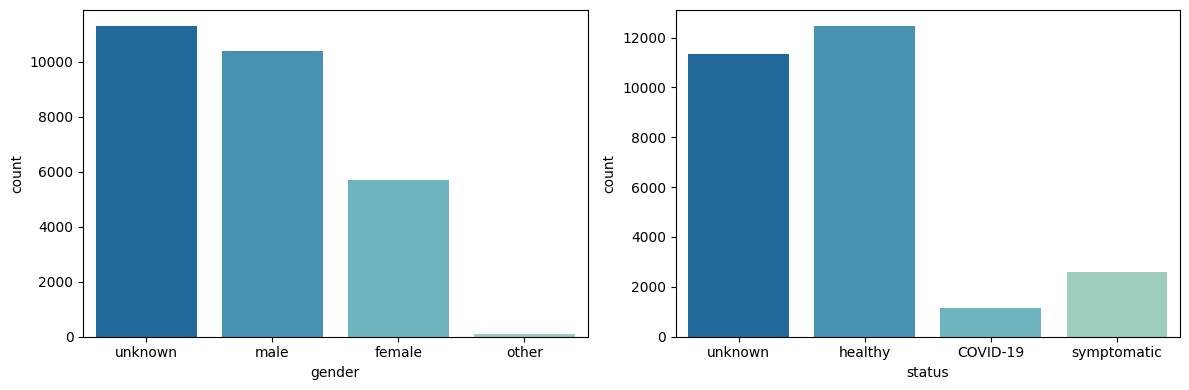

In [ ]:
data_full = data_raw.fillna('unknown')
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=data_full, x="gender", ax=axs[0])
sns.countplot(data=data_full, x="status", ax=axs[1])
f.tight_layout()

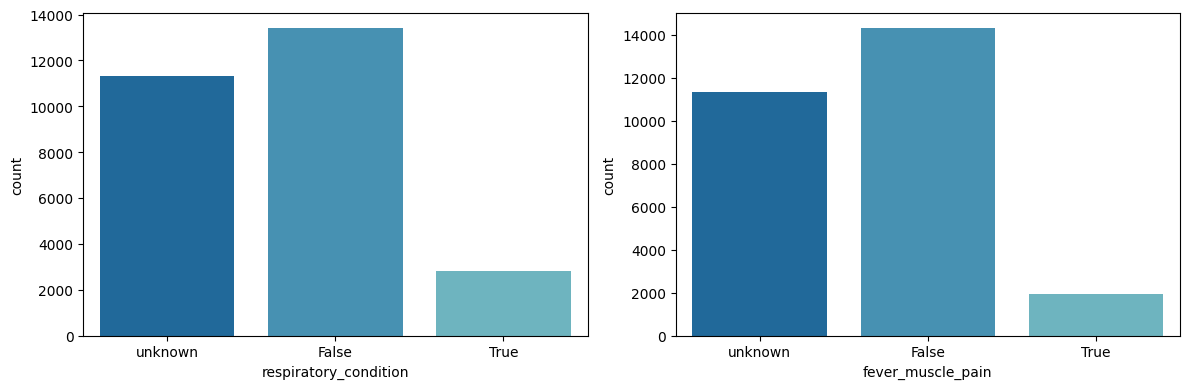

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=data_full, x="respiratory_condition", ax=axs[0])
sns.countplot(data=data_full, x="fever_muscle_pain", ax=axs[1])
f.tight_layout()

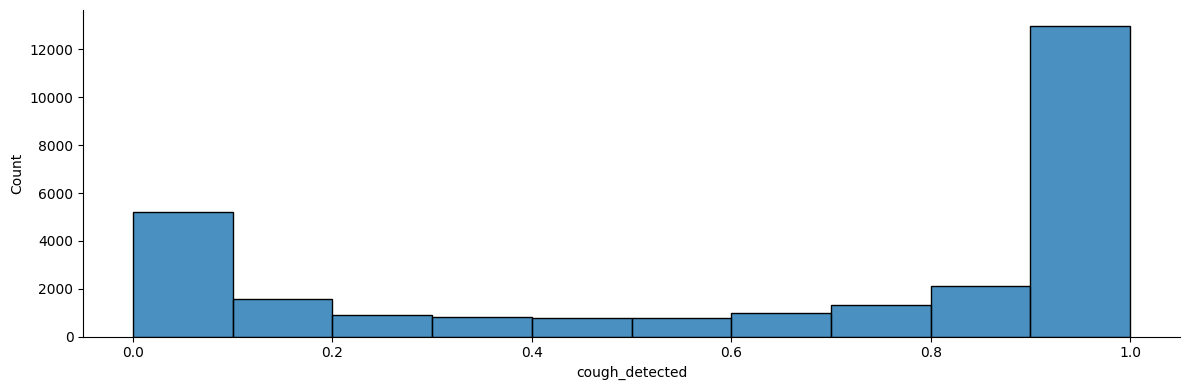

In [ ]:
sns.displot(data_full, x="cough_detected", bins=10, height=4, aspect=3)

### Expert annotation
Four expert physician assisted with the data quality by revising 320 recordings each, selecting one of the predefined options to each of the following 10 items:
* **Quality**: Good; Ok; Poor; No cough present.
* **Type of cough**: Wet (productive); Dry; Can’t tell.
* **Audible dyspnea**: Checkbox.
* **Audible wheezing**: Checkbox.
* **Audible stridor**: Checkbox.
* **Audible choking**: Checkbox.
* **Audible nasal congestion**: Checkbox.
* **Nothing specific**: Checkbox.
* **Impression**: I think this patient has…: An upper respiratory tract infection; A lower respiratory tract infection; Obstructive lung disease (Asthma, COPD, …); COVID-19; Nothing (healthy cough).
* **Impression**: the cough is probably…: Pseudocough/Healthy cough (from a healthy person); Mild (from a sick person); Severe (from a sick person); Can’t tell.

In [ ]:
def split_by_physicians(df):
    column_names = ['uuid', 'datetime', 'cough_detected', 'SNR', 'latitude', 'longitude',
                    'age', 'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
                    'quality', 'cough_type', 'dyspnea', 'wheezing', 'stridor', 'choking',
                    'congestion', 'nothing', 'diagnosis', 'severity' ]
    physician_01 = df.iloc[:, 0:21]
    physician_01 = physician_01[physician_01.quality_1.notna()].reset_index(drop=True)
    physician_01.columns = column_names
    physician_01['physician'] = 'P01'

    physician_02 = pd.concat([df.iloc[:, 0:11], df.iloc[:, 21:31]], axis=1)
    physician_02 = physician_02[physician_02.quality_2.notna()].reset_index(drop=True)
    physician_02.columns = column_names
    physician_02['physician'] = 'P02'

    physician_03 = pd.concat([df.iloc[:, 0:11], df.iloc[:, 31:41]], axis=1)
    physician_03 = physician_03[physician_03.quality_3.notna()].reset_index(drop=True)
    physician_03.columns = column_names
    physician_03['physician'] = 'P03'

    physician_04 = pd.concat([df.iloc[:, 0:11], df.iloc[:, 41:51]], axis=1)
    physician_04 = physician_04[physician_04.quality_4.notna()].reset_index(drop=True)
    physician_04.columns = column_names
    physician_04['physician'] = 'P04'
    return physician_01, physician_02, physician_03, physician_04

In [ ]:
physician_01, physician_02, physician_03, physician_04 = split_by_physicians(data_raw)
annotated_df = pd.concat([physician_01,physician_02,physician_03,physician_04]).reset_index(drop=True)
annotated_df = annotated_df.fillna('unknown')
annotated_df.head(3)

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,cough_type,dyspnea,wheezing,stridor,choking,congestion,nothing,diagnosis,severity,physician
0,006d8d1c-2bf6-46a6-8ef2-1823898a4733,2020-04-22T10:24:21.408615+00:00,1.0,13.284361,unknown,unknown,28.0,male,True,True,...,dry,False,False,False,False,False,True,healthy_cough,pseudocough,P01
1,01208e5c-5338-4f1b-b8c6-41c049e40d90,2020-04-12T17:13:03.918683+00:00,1.0,33.074744,unknown,unknown,unknown,unknown,unknown,unknown,...,dry,False,False,False,False,False,True,lower_infection,mild,P01
2,01567151-7bb2-45ee-9aa8-a1332b5941ea,2020-04-14T15:22:08.514166+00:00,1.0,12.116609,unknown,unknown,unknown,unknown,unknown,unknown,...,dry,False,False,False,True,False,False,COVID-19,mild,P01


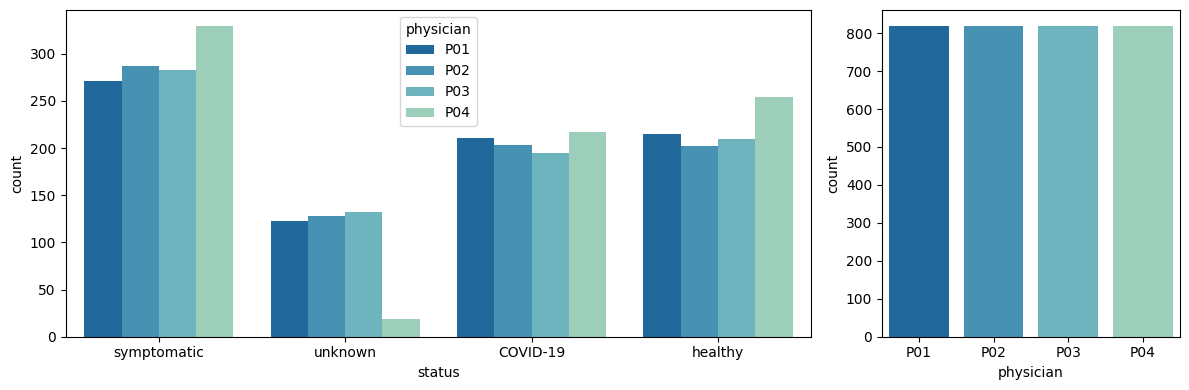

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[10, 4]))
sns.countplot(data=annotated_df, x="status", hue='physician', ax=axs[0])
sns.countplot(data=annotated_df, x="physician", ax=axs[1])
f.tight_layout()

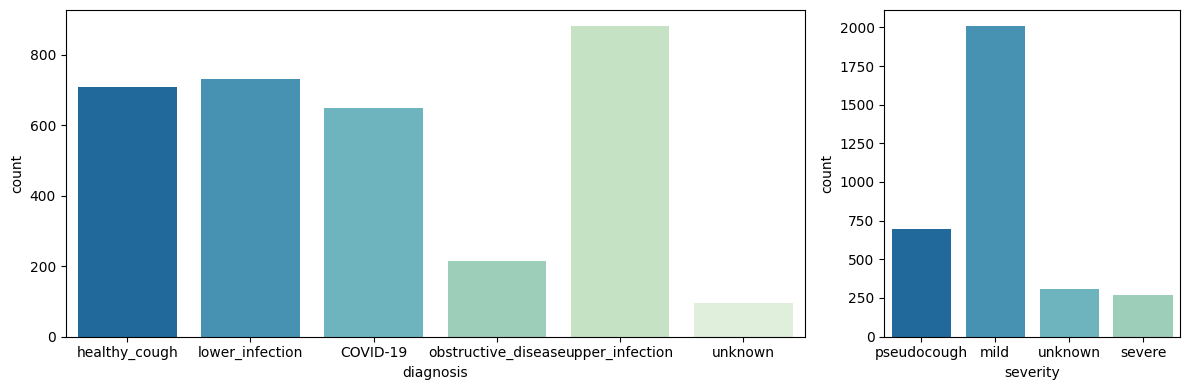

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[10, 4]))
sns.countplot(data=annotated_df, x="diagnosis", ax=axs[0])
sns.countplot(data=annotated_df, x="severity", ax=axs[1])
f.tight_layout()

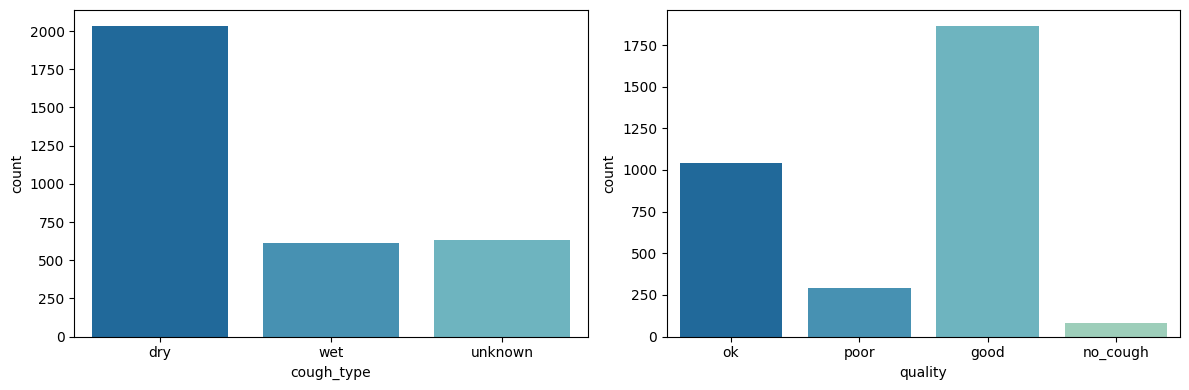

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="cough_type", ax=axs[0])
sns.countplot(data=annotated_df, x="quality", ax=axs[1])
f.tight_layout()

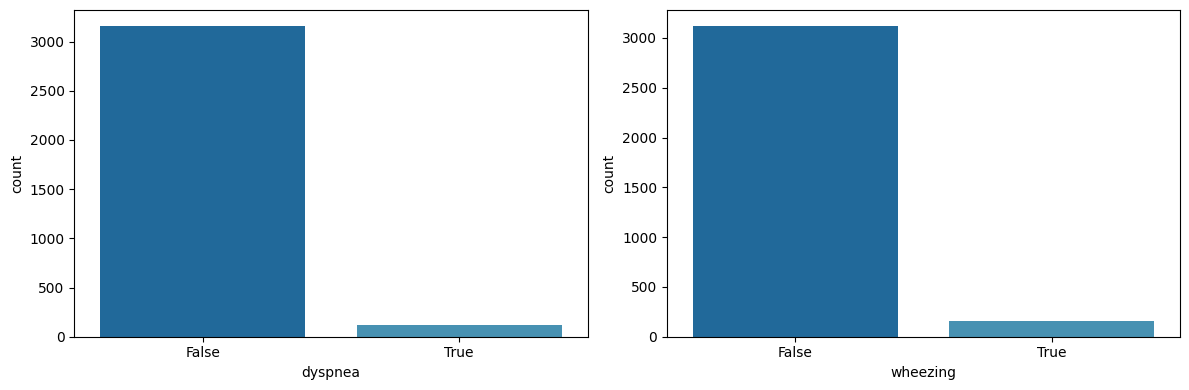

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="dyspnea", ax=axs[0])
sns.countplot(data=annotated_df, x="wheezing", ax=axs[1])
f.tight_layout()

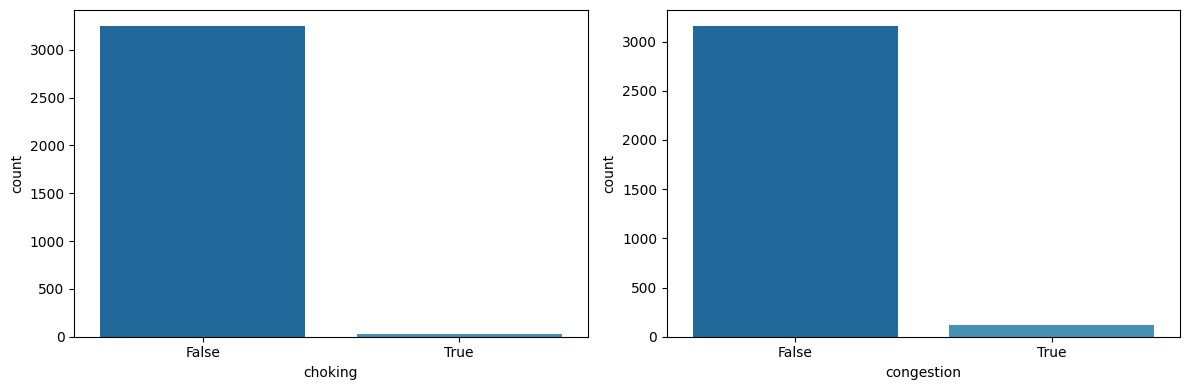

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="choking", ax=axs[0])
sns.countplot(data=annotated_df, x="congestion", ax=axs[1])
f.tight_layout()

### Audio data examples

In [ ]:
healthy_sample = ROOT+data_raw[data_raw.uuid == 'a28776b5-b876-47ac-8973-9ca280156608'].uuid.values[0]+'.wav'
covid_sample = ROOT+data_raw[data_raw.uuid == 'ffbca476-8b35-4797-bc8a-b7f0a2f24b55'].uuid.values[0]+'.wav'
symptomatic_sample = ROOT+data_raw[data_raw.uuid == '6d8fcfb2-7aff-4143-a319-99d568035655'].uuid.values[0]+'.wav'

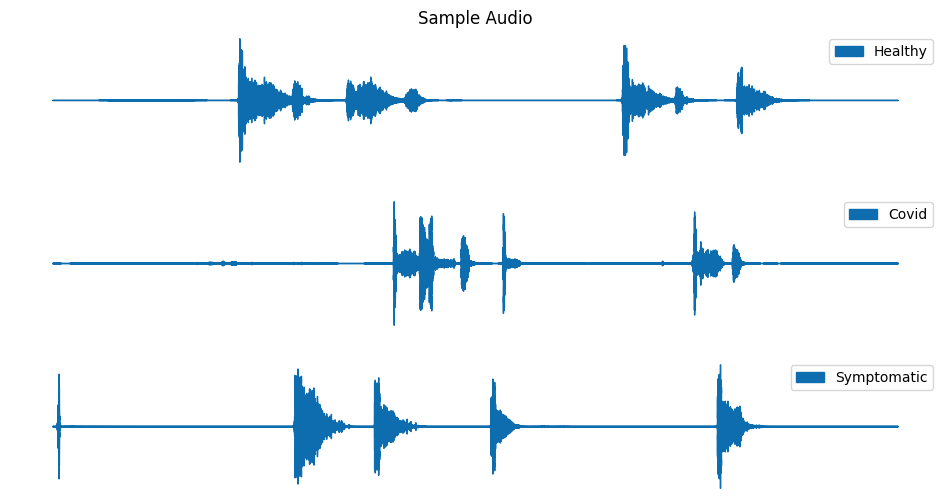

In [ ]:
healthy_audio, fs = librosa.load(healthy_sample, mono=True)
covid_audio, fs = librosa.load(covid_sample, mono=True)
symptomatic_audio, fs = librosa.load(symptomatic_sample, mono=True)

fig, (ax, ax1, ax2) = plt.subplots(nrows=3, figsize=(12,6))
ax.set(title='Sample Audio')
librosa.display.waveshow(healthy_audio, sr=fs, ax=ax, label='Healthy')
librosa.display.waveshow(covid_audio, sr=fs, ax=ax1, label='Covid')
librosa.display.waveshow(symptomatic_audio, sr=fs,  ax=ax2, label='Symptomatic')
ax.axis('off')
ax.label_outer()
ax.legend()
ax1.axis('off')
ax1.label_outer()
ax1.legend()
ax2.axis('off')
ax2.label_outer()
ax2.legend()

In [ ]:
# healthy sample
display.Audio(healthy_audio, rate=fs)

In [ ]:
# covid sample
display.Audio(covid_audio, rate=fs)

In [ ]:
# symptomatic sample
display.Audio(symptomatic_audio, rate=fs)

### Pre-processing and cough segmentation

In [ ]:
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter,filtfilt
from scipy.signal import cwt
from scipy.signal import hilbert
from scipy.signal import resample
from scipy.signal import decimate
from scipy.signal import spectrogram
from scipy.signal.windows import get_window

def preprocess_cough(x,fs, cutoff = 6000, normalize = True, filter_ = True, downsample = True):

    # Normalize, lowpass filter, and downsample cough samples in a given data folder
    fs_downsample = cutoff*2

    #Preprocess Data
    if len(x.shape)>1:
        x = np.mean(x,axis=1)                          # Convert to mono
    if normalize:
        x = x/(np.max(np.abs(x))+1e-17)                # Norm to range between -1 to 1
    if filter_:
        b, a = butter(4, fs_downsample/fs, btype='lowpass') # 4th order butter lowpass filter
        x = filtfilt(b, a, x)
    if downsample:
        x = signal.decimate(x, int(fs/fs_downsample)) # Downsample for anti-aliasing

    fs_new = fs_downsample

    return np.float32(x), fs_new

def segment_cough(x,fs, cough_padding=0.2,min_cough_len=0.2, th_l_multiplier = 0.1, th_h_multiplier = 2):
    #Preprocess the data by segmenting each file into individual coughs using a hysteresis comparator on the signal power

    cough_mask = np.array([False]*len(x))

    #Define hysteresis thresholds
    rms = np.sqrt(np.mean(np.square(x)))
    seg_th_l = th_l_multiplier * rms
    seg_th_h =  th_h_multiplier*rms

    #Segment coughs
    coughSegments = []
    padding = round(fs*cough_padding)
    min_cough_samples = round(fs*min_cough_len)
    cough_start = 0
    cough_end = 0
    cough_in_progress = False
    tolerance = round(0.01*fs)
    below_th_counter = 0

    for i, sample in enumerate(x**2):
        if cough_in_progress:
            if sample<seg_th_l:
                below_th_counter += 1
                if below_th_counter > tolerance:
                    cough_end = i+padding if (i+padding < len(x)) else len(x)-1
                    cough_in_progress = False
                    if (cough_end+1-cough_start-2*padding>min_cough_samples):
                        coughSegments.append(x[cough_start:cough_end+1])
                        cough_mask[cough_start:cough_end+1] = True
            elif i == (len(x)-1):
                cough_end=i
                cough_in_progress = False
                if (cough_end+1-cough_start-2*padding>min_cough_samples):
                    coughSegments.append(x[cough_start:cough_end+1])
            else:
                below_th_counter = 0
        else:
            if sample>seg_th_h:
                cough_start = i-padding if (i-padding >=0) else 0
                cough_in_progress = True

    return coughSegments, cough_mask

(-4035.1000000000004, 84737.1, -0.9297255754470826, 1.0918916940689087)

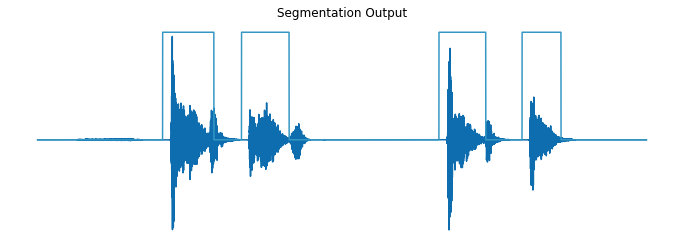

In [ ]:
# Preprocess (Normalize, lowpass filter, and downsample cough samples)
processed_audio, sample_rate = preprocess_cough(healthy_audio, fs)

# Segment each audio into individual coughs using a hysteresis comparator on the signal power
cough_segments, cough_mask = segment_cough(processed_audio, sample_rate, min_cough_len=0.1, cough_padding=0.1, th_l_multiplier = 0.1, th_h_multiplier = 2)

fig = plt.figure(figsize=(12,4))
plt.plot(processed_audio)
plt.plot(cough_mask)
plt.title("Segmentation Output")
plt.axis('off')

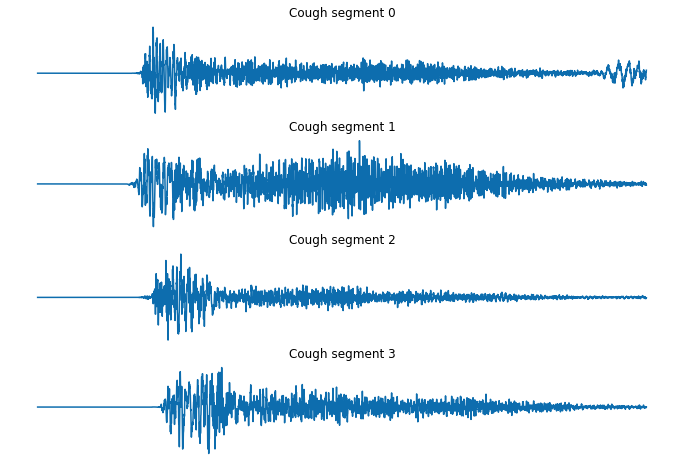

In [ ]:
fig, axs = plt.subplots(len(cough_segments),1, figsize=(12,8))
for i in range(0,len(cough_segments)):
    axs[i].plot(cough_segments[i])
    axs[i].set_title("Cough segment " + str(i))
    axs[i].axis('off')

In [ ]:
# first segment healthy sample
display.Audio(cough_segments[0], rate=fs)

## Audio Data Features Extraction

Sound is represented in the form of an audio signal having parameters such as frequency, bandwidth, decibel, etc. A typical audio signal can be expressed as a function of Amplitude and Time.

Because the audio data presented cannot be interpreted directly by the models, feature extraction is utilised to convert it to a comprehensible format. It is a process that explains most of the data but in an understandable way. Commonly used features or representations that are directly fed into neural network architectures are spectrograms, mel-spectrograms, and Mel-Frequency Cepstral Coefficients (MFCCs).

### Spectrogram
A spectrogram is a graphical representation of the signal strength, or "loudness," of a signal over time at various frequencies present in a waveform. Not only can one see whether there is more or less energy at a particular frequency, such as 2 Hz vs 10 Hz, but also how the energy levels vary over time.

### Short-Time Fourier Transform
The Short-Time Fourier Transform (STFT) is an immensely useful tool for processing audio signals. It defines a particularly useful class of time-frequency distributions that specify the complex amplitude versus time and frequency characteristics of any signal.

It is obtained by applying the Short-Time Fourier Transform (STFT) on the signal. In the simplest of terms, the STFT of a signal is calculated by applying the Fast Fourier Transform (FFT) locally on small-time segments of the signal. Typically, a spectrogram is depicted as a heat map, that is, an image with the intensity indicated by varying the colour or brightness.

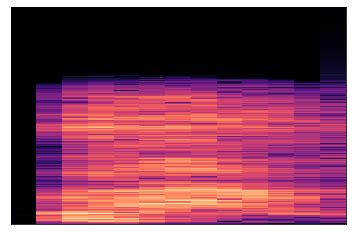

In [ ]:
# Short Term Fourier Transform
audio_data = cough_segments[1]
stft = np.abs(librosa.stft(audio_data))
Dstft = librosa.amplitude_to_db(stft, ref=np.max)
ax = librosa.display.specshow(Dstft)

### Mel-spectrogram
Humans perceive sound logarithmically. We are more sensitive to differences in lower frequencies than to differences in higher frequencies. For example, while we can easily distinguish between 500 and 1000 Hz, we will struggle to distinguish between 10,000 and 10,500 Hz, even if the distance between the two pairs is the same. As a result, the mel scale was created. It is a logarithmic scale based on the axiom that equal distances on the scale correspond to the same perceived distance.

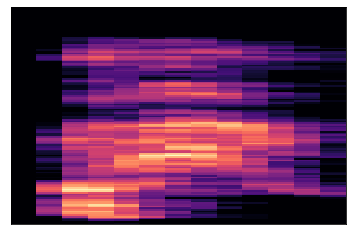

In [ ]:
# compute a mel-scaled spectrogram.
mel = librosa.feature.melspectrogram(audio_data, sr=fs)
Dmel = librosa.amplitude_to_db(mel, ref=np.max)
ax = librosa.display.specshow(Dmel)

### Mel-Frequency Cepstral Coefficients
The Mel-Frequency Cepstrum Coefficients (MFCCs) are the coefficients that comprise the mel-frequency cepstrum. The cepstrum of a signal contains information about the rate of change in its spectral bands.

A cepstrum is essentially a spectrum of the log of the time signal's spectrum. The resulting spectrum is neither in the frequency domain nor in the time domain and thus has been dubbed the quefrency domain. The cepstrum communicates the various values that contribute to the formation of a sound's formants (a characteristic component of the quality of a speech sound) and timbre.

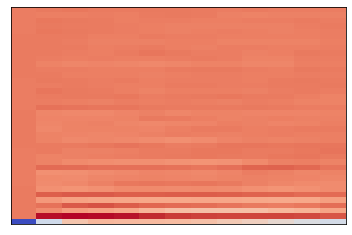

In [ ]:
# mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(y=audio_data, sr=fs, n_mfcc=40)
ax = librosa.display.specshow(mfcc)

### Chroma Features
Chroma features are a highly effective method of representing music audio in which we use a 12-element representation of spectral energy called a chroma vector in which each of the 12 bins represents one of the twelve equal-tempered pitch classes found in western-style music (semitone spacing). It can be calculated from the input sound signal's logarithmic short-time Fourier transform, also known as a chromatogram or pitch class profile.

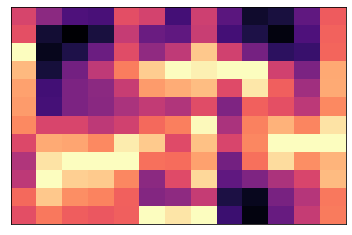

In [ ]:
# compute a chromagram from a waveform or power spectrogram.
chroma = librosa.feature.chroma_stft(S=stft, sr=fs)
ax = librosa.display.specshow(chroma)

#### Part 2 | Machine Learning Algorithm Comparison

https://www.kaggle.com/nasrulhakim86/covid-19-screening-from-audio-part-2?scriptVersionId=73794324